Assignment 5

Q1,Q2,Q3,Q4,Q6,Q7

In [182]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [183]:
print(torch.__version__)

1.10.0+cpu


In [184]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])



mnist_test = datasets.MNIST(root='D:\Deep Learning', train=False, download=True, transform=transform)

mnist_train = datasets.MNIST(root='D:\Deep Learning', train=True, download=True, transform=transform)

image1 = mnist_train[1][0]
image1.shape

torch.Size([1, 28, 28])

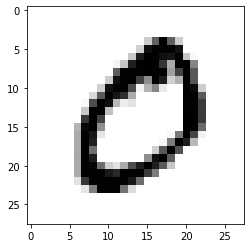

In [185]:
plt.imshow(image1.numpy().squeeze(), cmap='gray_r')

image1.shape
image1 = image1.numpy()

image1 = image1.transpose(1, 2, 0)
image1.shape

img = image1.reshape(28, 28)

In [186]:
print(mnist_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:\Deep Learning
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


Arranging shuffle with Data

In [187]:
from torch.utils.data import DataLoader

shuffled_data = {
    'train' : torch.utils.data.DataLoader(mnist_train, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(mnist_test, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
shuffled_data

{'train': <torch.utils.data.dataloader.DataLoader at 0x2199a7abb80>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2199a776040>}

In [188]:
len(shuffled_data['train'])

600

In [189]:
import torch.nn as nn
class Convolution(nn.Module):
    def __init__(self):
        super(Convolution,self).__init__()
        self.bn1=None
        self.activation1=None
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            )
        self.conv2=nn.Sequential(
            nn.Conv2d(4,4,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out1=nn.Linear(7*7*4,49)
        self.out2=nn.Linear(49,10)
    
    def forward(self,x):
       # x=torch.unsqueeze(x, 0)
        x=self.conv1(x)
        self.activation1=x
        #print(x.shape)
        x=self.conv2(x)
        self.activation2=x
        #3print(x.shape)
        x=x.view(x.size(0),-1)
        self.bn1=x
        #print(x.shape)
        output1=self.out1(x)
        #print(output1.shape)
        output2=self.out2(output1)
        #print(output2.shape)
        return output2,x

    


In [190]:
cnn=Convolution()
print(cnn)

Convolution(
  (conv1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(4, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out1): Linear(in_features=196, out_features=49, bias=True)
  (out2): Linear(in_features=49, out_features=10, bias=True)
)


In [191]:
entropy_loss = nn.CrossEntropyLoss()   
entropy_loss

CrossEntropyLoss()

RMS prop


In [192]:
from torch import optim
optimizer=optim.RMSprop(cnn.parameters(), lr=0.001, alpha=0.9)
optimizer                       

RMSprop (
Parameter Group 0
    alpha: 0.9
    centered: False
    eps: 1e-08
    lr: 0.001
    momentum: 0
    weight_decay: 0
)

In [193]:
def test():
    cnn.eval()
    with torch.no_grad():
        correct=0
        total=0
        for images, labels in shuffled_data['test']:
            output_test,last_layer=cnn(images)
            pred_y=torch.max(output_test,1)[1].data.squeeze()
            accuracy = (pred_y==labels).sum().item()/float(labels.size(0))
            pass
        pass
    return accuracy
    

In [194]:
def Tsne():
    bn1=cnn.bn1
    bn=bn1.detach().numpy()
    from sklearn.manifold import TSNE
    model = TSNE(n_components=2, random_state=0)
    X=model.fit_transform(bn)
    plt.scatter(X[:,0], X[:,1])

Epoch [1/15], Step [100/600], Loss: 0.4406
Epoch [1/15], Step [200/600], Loss: 0.2862
Epoch [1/15], Step [300/600], Loss: 0.2469
Epoch [1/15], Step [400/600], Loss: 0.1408
Epoch [1/15], Step [500/600], Loss: 0.1086
Epoch [1/15], Step [600/600], Loss: 0.1085
Test accuracy after epoch is: 0.93
Epoch [2/15], Step [100/600], Loss: 0.0525
Epoch [2/15], Step [200/600], Loss: 0.1995
Epoch [2/15], Step [300/600], Loss: 0.1488
Epoch [2/15], Step [400/600], Loss: 0.1535
Epoch [2/15], Step [500/600], Loss: 0.0865
Epoch [2/15], Step [600/600], Loss: 0.1129
Test accuracy after epoch is: 0.94
Epoch [3/15], Step [100/600], Loss: 0.0839
Epoch [3/15], Step [200/600], Loss: 0.0398
Epoch [3/15], Step [300/600], Loss: 0.0159
Epoch [3/15], Step [400/600], Loss: 0.0155
Epoch [3/15], Step [500/600], Loss: 0.1110
Epoch [3/15], Step [600/600], Loss: 0.1195
Test accuracy after epoch is: 0.98
Epoch [4/15], Step [100/600], Loss: 0.1573
Epoch [4/15], Step [200/600], Loss: 0.1350
Epoch [4/15], Step [300/600], Loss:

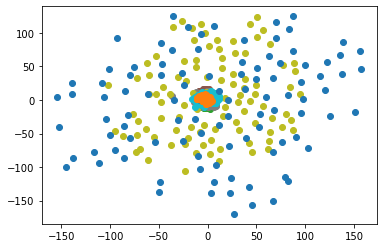

In [195]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn(batch_x)[0]
            
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
    
                pass
                if(epoch==0):
                    Tsne()
                if(epoch==14):
                    Tsne()
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




Epoch [1/15], Step [100/600], Loss: 0.0850
Epoch [1/15], Step [200/600], Loss: 0.0974
Epoch [1/15], Step [300/600], Loss: 0.0318
Epoch [1/15], Step [400/600], Loss: 0.0180
Epoch [1/15], Step [500/600], Loss: 0.0063
Epoch [1/15], Step [600/600], Loss: 0.1787
Test accuracy after epoch is: 1.00
Epoch [2/15], Step [100/600], Loss: 0.0165
Epoch [2/15], Step [200/600], Loss: 0.0396
Epoch [2/15], Step [300/600], Loss: 0.1104
Epoch [2/15], Step [400/600], Loss: 0.0289
Epoch [2/15], Step [500/600], Loss: 0.0575
Epoch [2/15], Step [600/600], Loss: 0.0182
Test accuracy after epoch is: 0.99
Epoch [3/15], Step [100/600], Loss: 0.0520
Epoch [3/15], Step [200/600], Loss: 0.1398
Epoch [3/15], Step [300/600], Loss: 0.0138
Epoch [3/15], Step [400/600], Loss: 0.1057
Epoch [3/15], Step [500/600], Loss: 0.0379
Epoch [3/15], Step [600/600], Loss: 0.1176
Test accuracy after epoch is: 0.97
Epoch [4/15], Step [100/600], Loss: 0.0878
Epoch [4/15], Step [200/600], Loss: 0.0114
Epoch [4/15], Step [300/600], Loss:

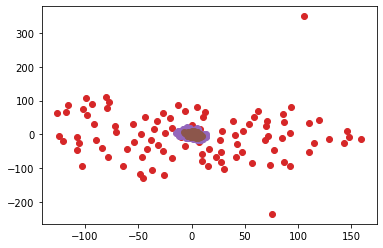

In [196]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn(batch_x)[0]
            
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
    
                pass
                if(epoch==14):
                    Tsne()
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




In [197]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn(batch_x)[0]
            
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
    
                pass
                if(epoch==15):
                    Tsne
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




Epoch [1/15], Step [100/600], Loss: 0.0198
Epoch [1/15], Step [200/600], Loss: 0.0710
Epoch [1/15], Step [300/600], Loss: 0.0063
Epoch [1/15], Step [400/600], Loss: 0.0072
Epoch [1/15], Step [500/600], Loss: 0.0581
Epoch [1/15], Step [600/600], Loss: 0.0036
Test accuracy after epoch is: 1.00
Epoch [2/15], Step [100/600], Loss: 0.0012
Epoch [2/15], Step [200/600], Loss: 0.0324
Epoch [2/15], Step [300/600], Loss: 0.0162
Epoch [2/15], Step [400/600], Loss: 0.0233
Epoch [2/15], Step [500/600], Loss: 0.0377
Epoch [2/15], Step [600/600], Loss: 0.0052
Test accuracy after epoch is: 1.00
Epoch [3/15], Step [100/600], Loss: 0.0467
Epoch [3/15], Step [200/600], Loss: 0.0330
Epoch [3/15], Step [300/600], Loss: 0.0231
Epoch [3/15], Step [400/600], Loss: 0.0374
Epoch [3/15], Step [500/600], Loss: 0.0365
Epoch [3/15], Step [600/600], Loss: 0.0200
Test accuracy after epoch is: 1.00
Epoch [4/15], Step [100/600], Loss: 0.0022
Epoch [4/15], Step [200/600], Loss: 0.0040
Epoch [4/15], Step [300/600], Loss:

In [198]:
import matplotlib.pyplot as plt
activation=cnn.activation1
activation=activation.detach().numpy()



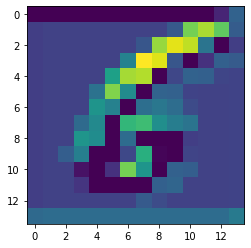

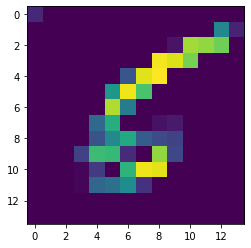

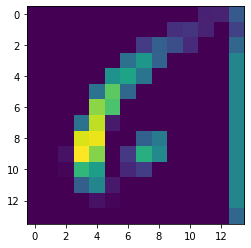

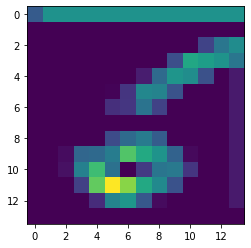

In [199]:
for i in range(4):
    plt.imshow(activation[0][i])
    plt.show()

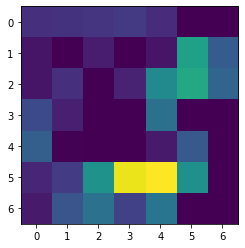

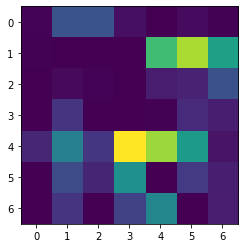

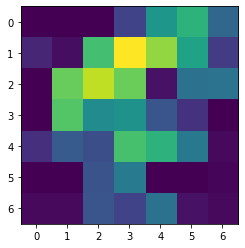

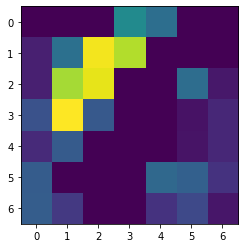

In [200]:
activation=cnn.activation2
activation=activation.detach().numpy()
for i in range(4):
    plt.imshow(activation[0][i])
    plt.show()

With dropout

In [201]:
import torch.nn as nn
class Convolutiond(nn.Module):
    def __init__(self):
        super(Convolutiond,self).__init__()
        self.bn1=None
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            )
        self.conv2=nn.Sequential(
            nn.Conv2d(4,4,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out1=nn.Linear(7*7*4,49)
        self.out2=nn.Linear(49,10)
    
    def forward(self,x):
       # x=torch.unsqueeze(x, 0)
        x=self.conv1(x)
        #print(x.shape)
        x=self.conv2(x)
        #3print(x.shape)
        x=x.view(x.size(0),-1)
        self.bn1=x
        #print(x.shape)
        output1=self.out1(x)
        m = nn.Dropout(p=0.2)
        input = torch.randn(20, 16)
        output1 = m(output1)
        #print(output1.shape)
        output2=self.out2(output1)
        #print(output2.shape)
        return output2,x

    


In [202]:
cnn1=Convolutiond()
print(cnn1)

Convolutiond(
  (conv1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(4, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out1): Linear(in_features=196, out_features=49, bias=True)
  (out2): Linear(in_features=49, out_features=10, bias=True)
)


In [203]:
def test():
    cnn1.eval()
    with torch.no_grad():
        correct=0
        total=0
        for images, labels in shuffled_data['test']:
            output_test,last_layer=cnn1(images)
            pred_y=torch.max(output_test,1)[1].data.squeeze()
            accuracy = (pred_y==labels).sum().item()/float(labels.size(0))
            pass
        pass
    return accuracy

In [204]:
#def Tsne()
 #   bn1=cnn1.bn1
  #  bn=bn1.detach().numpy()
   # from sklearn.manifold import TSNE
  #  model = TSNE(n_components=2, random_state=0)
#    X=model.fit_transform(bn)
 #   plt.scatter(X[:,0], X[:,1])

In [ ]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn1.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn1(batch_x)[0]
            if(epoch==1 or 15):
                Tsne()
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
                pass
                if(epoch==0 or 15):
                    Tsne()
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn1,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




Epoch [1/15], Step [100/600], Loss: 2.3275
Epoch [1/15], Step [200/600], Loss: 2.3359
Epoch [1/15], Step [300/600], Loss: 2.3309
Epoch [1/15], Step [400/600], Loss: 2.3427
Epoch [1/15], Step [500/600], Loss: 2.3334
Epoch [1/15], Step [600/600], Loss: 2.3271
Test accuracy after epoch is: 0.07
Epoch [2/15], Step [100/600], Loss: 2.3092
Epoch [2/15], Step [200/600], Loss: 2.3203
Epoch [2/15], Step [300/600], Loss: 2.3232
Epoch [2/15], Step [400/600], Loss: 2.3294
Epoch [2/15], Step [500/600], Loss: 2.3127
Epoch [2/15], Step [600/600], Loss: 2.3240
Test accuracy after epoch is: 0.11
Epoch [3/15], Step [100/600], Loss: 2.3110
Epoch [3/15], Step [200/600], Loss: 2.3015
Epoch [3/15], Step [300/600], Loss: 2.3223
Epoch [3/15], Step [400/600], Loss: 2.3278
Epoch [3/15], Step [500/600], Loss: 2.3206
Epoch [3/15], Step [600/600], Loss: 2.3055
Test accuracy after epoch is: 0.14


In [ ]:
import torch.nn as nn
class Convolutiond(nn.Module):
    def __init__(self):
        super(Convolutiond,self).__init__()
        self.bn1=None
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            )
        self.conv2=nn.Sequential(
            nn.Conv2d(4,4,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out1=nn.Linear(7*7*4,49)
        self.out2=nn.Linear(49,10)
    
    def forward(self,x):
       # x=torch.unsqueeze(x, 0)
        x=self.conv1(x)
        #print(x.shape)
        x=self.conv2(x)
        #3print(x.shape)
        x=x.view(x.size(0),-1)
        self.bn1=x
        #print(x.shape)
        output1=self.out1(x)
        m = nn.Dropout(p=0.5)
        input = torch.randn(20, 16)
        output1 = m(output1)
        #print(output1.shape)
        output2=self.out2(output1)
        #print(output2.shape)
        return output2,x

    


In [ ]:
cnn1=Convolutiond()
print(cnn1)

In [ ]:
def test():
    cnn1.eval()
    with torch.no_grad():
        correct=0
        total=0
        for images, labels in shuffled_data['test']:
            output_test,last_layer=cnn1(images)
            pred_y=torch.max(output_test,1)[1].data.squeeze()
            accuracy = (pred_y==labels).sum().item()/float(labels.size(0))
            pass
        pass
    return accuracy

In [ ]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn1.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn1(batch_x)[0]
            if(epoch==14):
                bn2=cnn1.bn1
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
                pass
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn1,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




In [ ]:
import torch.nn as nn
class Convolutiond(nn.Module):
    def __init__(self):
        super(Convolutiond,self).__init__()
        self.bn1=None
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            )
        self.conv2=nn.Sequential(
            nn.Conv2d(4,4,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out1=nn.Linear(7*7*4,49)
        self.out2=nn.Linear(49,10)
    
    def forward(self,x):
       # x=torch.unsqueeze(x, 0)
        x=self.conv1(x)
        #print(x.shape)
        x=self.conv2(x)
        #3print(x.shape)
        x=x.view(x.size(0),-1)
        self.bn1=x
        #print(x.shape)
        output1=self.out1(x)
        m = nn.Dropout(p=0.8)
        output1 = m(output1)
        #print(output1.shape)
        output2=self.out2(output1)
        #print(output2.shape)
        return output2,x

    


In [ ]:
cnn1=Convolutiond()
print(cnn1)

In [ ]:
def test():
    cnn1.eval()
    with torch.no_grad():
        correct=0
        total=0
        for images, labels in shuffled_data['test']:
            output_test,last_layer=cnn1(images)
            pred_y=torch.max(output_test,1)[1].data.squeeze()
            accuracy = (pred_y==labels).sum().item()/float(labels.size(0))
            pass
        pass
    return accuracy

In [ ]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn1.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn1(batch_x)[0]
            if(epoch==14):
                bn2=cnn1.bn1
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
                pass
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn1,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




With batch Normalization

In [ ]:
import torch.nn as nn
class Convolutiondb(nn.Module):
    def __init__(self):
        super(Convolutiondb,self).__init__()
        self.bn1=None
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            )
        self.conv2=nn.Sequential(
            nn.Conv2d(4,4,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out1=nn.Linear(7*7*4,49)
        self.out2=nn.Linear(49,10)
    
    def forward(self,x):
       # x=torch.unsqueeze(x, 0)
        x=self.conv1(x)
        #print(x.shape)
        x=self.conv2(x)
        #3print(x.shape)
        x=x.view(x.size(0),-1)
        self.bn1=x
        #print(x.shape)
        output1=self.out1(x)
        m = nn.Dropout(p=0.2)
        output1 = m(output1)
        n = nn.BatchNorm1d(49, affine=False)
      #  inputval = torch.randn(22, 102)
        output1 = n(output1)
        #print(output1.shape)
        output2=self.out2(output1)
        #print(output2.shape)
        return output2,x

    


In [ ]:
cnn1=Convolutiondb()
print(cnn1)

In [ ]:
def test():
    cnn1.eval()
    with torch.no_grad():
        correct=0
        total=0
        for images, labels in shuffled_data['test']:
            output_test,last_layer=cnn1(images)
            pred_y=torch.max(output_test,1)[1].data.squeeze()
            accuracy = (pred_y==labels).sum().item()/float(labels.size(0))
            pass
        pass
    return accuracy

In [ ]:
from torch.autograd import Variable

num_epochs=15
acclist=[]
def train(num_epochs,cnn,shuffled_data):
    cnn1.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape
            output=cnn1(batch_x)[0]
            if(epoch==14):
                bn2=cnn1.bn1
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer.zero_grad()
    
            loss.backward()
            optimizer.step()
            
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
                pass
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist.append(test())
        pass
    
    
train(num_epochs,cnn1,shuffled_data)
final_accuracy=sum(acclist)/len(acclist)
print("Model accuracy is:" ,final_accuracy)




SGD

In [ ]:
from torch import optim
optimizer1=optim.SGD(cnn.parameters(), lr=0.001)
optimizer1  

In [ ]:
from torch.autograd import Variable

num_epochs=15
acclist1=[]
def train(num_epochs,cnn,shuffled_data):
    cnn.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape)
            
            output=cnn(batch_x)[0]
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer1.zero_grad()
    
            loss.backward()
            optimizer1.step()
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
                pass
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist1.append(test())
        pass
train(num_epochs,cnn,shuffled_data)
final_accuracy=sum(acclist1)/len(acclist1)
print("Model accuracy is:" ,final_accuracy)




In [ ]:
import matplotlib.pyplot as plt
activation=cnn.activation1
activation=activation.detach().numpy()



In [ ]:
for i in range(4):
    plt.imshow(activation[0][i])
    plt.show()

In [ ]:
activation=cnn.activation2
activation=activation.detach().numpy()
for i in range(4):
    plt.imshow(activation[0][i])
    plt.show()

SGD with momentum

In [ ]:
from torch import optim
optimizer2=optim.SGD(cnn.parameters(), lr=0.001,momentum=0.9)
optimizer2 

In [ ]:
from torch.autograd import Variable

num_epochs=15
acclist2=[]
def train(num_epochs,cnn,shuffled_data):
    cnn.train()
    
    step_size=len(shuffled_data['train'])
    
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(shuffled_data['train']):
            batch_x=Variable(images)
            batch_y=Variable(labels)
           # print(batch_x[0].shape)
            
            output=cnn(batch_x)[0]
       # print(output)
        #print(output.dtype)
      #  output  = torch.stack(list(output), dim=0)
            loss=entropy_loss(output,batch_y)
            optimizer2.zero_grad()
    
            loss.backward()
            optimizer2.step()
            #print(i)
            if (i+1) %100 ==0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch + 1, num_epochs, i + 1, step_size, loss.item()))
                pass
            pass
        print("Test accuracy after epoch is: %.2f"%test())
        acclist2.append(test())
        pass
train(num_epochs,cnn,shuffled_data)
final_accuracy=sum(acclist2)/len(acclist2)
print("Model accuracy is:" ,final_accuracy)



In [ ]:

import matplotlib.pyplot as plt
activation=cnn.activation1
activation=activation.detach().numpy()
for i in range(4):
    plt.imshow(activation[0][i])
    plt.show()



In [ ]:
activation=cnn.activation2
activation=activation.detach().numpy()
for i in range(4):
    plt.imshow(activation[0][i])
    plt.show()

Q5

Q6